# **Linear Regression and Gradient Descent for Boston Housing data**


In [4]:
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [6]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### AS we see: MEDV     Median value of owner-occupied homes in $1000's

In [8]:
df = boston[['TAX','MEDV']]

In [9]:
df.rename(columns = {'MEDV':'PRICE'}, inplace = True)

In [10]:
df

,TAX,PRICE
0,296.0,24.0
1,242.0,21.6
2,242.0,34.7
3,222.0,33.4
4,222.0,36.2
...,...,...
501,273.0,22.4
502,273.0,20.6
503,273.0,23.9
504,273.0,22.0


In [11]:
df.describe()

,TAX,PRICE
count,506.000000,506.000000
mean,408.237154,22.532806
std,168.537116,9.197104
min,187.000000,5.000000
25%,279.000000,17.025000
50%,330.000000,21.200000
75%,666.000000,25.000000
max,711.000000,50.000000


### Select the feature and target variables


##### In this example, we're using the "TAX" variable (average number of rooms per dwelling) as the feature variable to predict the "PRICE" variable (house price).

In [12]:
X = df['TAX'].values.reshape(-1,1)  # average number of rooms per dwelling
y = df['PRICE'].values.reshape(-1,1)

# Splitting the data into training and testing sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# model evaluation for training set
y_train_pred = lr.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2_train = r2_score(y_train, y_train_pred)
print("Performance of the model on Training Data is RMSE : ",rmse_train)
print("Performance of the model on Training Data is R2 score : ",r2_train)

Performance of the model on Training Data is RMSE :  8.361485212149068
Performance of the model on Training Data is R2 score :  0.20458253108072988


### Making predictions on the testing data


In [15]:
# model evaluation for training set
y_test_pred = lr.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2_test = r2_score(y_test, y_test_pred)
print("Performance of the model on Training Data is RMSE : ",rmse_test)
print("Performance of the model on Training Data is R2 score : ",r2_test)

Performance of the model on Training Data is RMSE :  7.56243415567668
Performance of the model on Training Data is R2 score :  0.23247839962767558


### Calculating the root mean squared error (RMSE) and R-squared value of the model


In [16]:
rmse_test2 = np.sqrt(np.mean((y_test_pred - y_test) ** 2))
rmse_test2

7.56243415567668

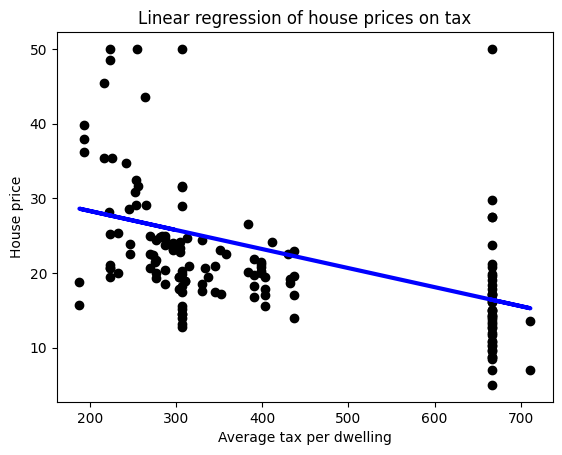

In [20]:
# Plot the regression line and scatterplot of the data
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xlabel('Average tax per dwelling')
plt.ylabel('House price')
plt.title('Linear regression of house prices on tax')
plt.show()


In [21]:
# Printing the model coefficients and performance metrics
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print('Root Mean squared error: %.2f' % rmse_test)
print('R-squared value: %.2f' % r2_test)

Coefficients: 
 [[-0.02550129]]
Intercept: 
 [33.3959255]
Root Mean squared error: 7.56
R-squared value: 0.23


In [19]:
formula = 'y = {:.2f}x + {:.2f}'.format(lr.coef_[0][0], lr.intercept_[0])
print('Linear regression formula: ', formula)

Linear regression formula:  y = -0.03x + 33.40
